In [1]:
import os

from IPython.display import display, Image, Markdown, Audio
from getpass import getpass

import requests

In [2]:
%load_ext dotenv
%dotenv

In [3]:
if "CLOUDFLARE_API_TOKEN" in os.environ:
    api_token = os.environ["CLOUDFLARE_API_TOKEN"]
else:
    api_token = getpass("Enter you Cloudflare API Token")

In [4]:
if "CLOUDFLARE_ACCOUNT_ID" in os.environ:
    account_id = os.environ["CLOUDFLARE_ACCOUNT_ID"]
else:
    account_id = getpass("Enter your account id")

## Text Generation

In [5]:
model = "@cf/meta/llama-2-7b-chat-int8" 
#model = "@cf/mistral/mistral-7b-instruct-v0.1" 

response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    json={"messages": [
        {"role": "system", "content": "You are a productivity assistant for users of Jupyter notebooks for both Mac and Windows users. Respond in Markdown."},
        {"role": "user", "content": "How do I use keyboard shortcuts to execute cells?"}
    ]}
)

inference = response.json()
display(Markdown(inference["result"]["response"]))

Great question! 😊

### Mac Users:

To execute cells using keyboard shortcuts on a Mac, you can use the following combinations:

| Shortcut | Description |
| --- | --- |
| `Ctrl + Enter` | Execute the current cell. |
| `Shift + Enter` | Execute the current cell and move to the next cell. |
| `Cmd + Enter` | Execute the current cell and move to the next cell. (Only works in Jupyter Notebook 1.0 and later.) |

### Windows Users:

On Windows, you can use the following keyboard shortcuts to execute cells:

| Shortcut | Description |
| --- | --- |
| `Ctrl + Enter` | Execute the current cell. |
| `Shift + Enter` | Execute the current cell and move to the next cell. |
| `Shift + Ctrl + Enter` | Execute the current cell and move to the next cell without leaving the cell. |

Tips:

* You can also use the `F5` key to execute the current cell on both Mac and Windows.
*

## Text to Image

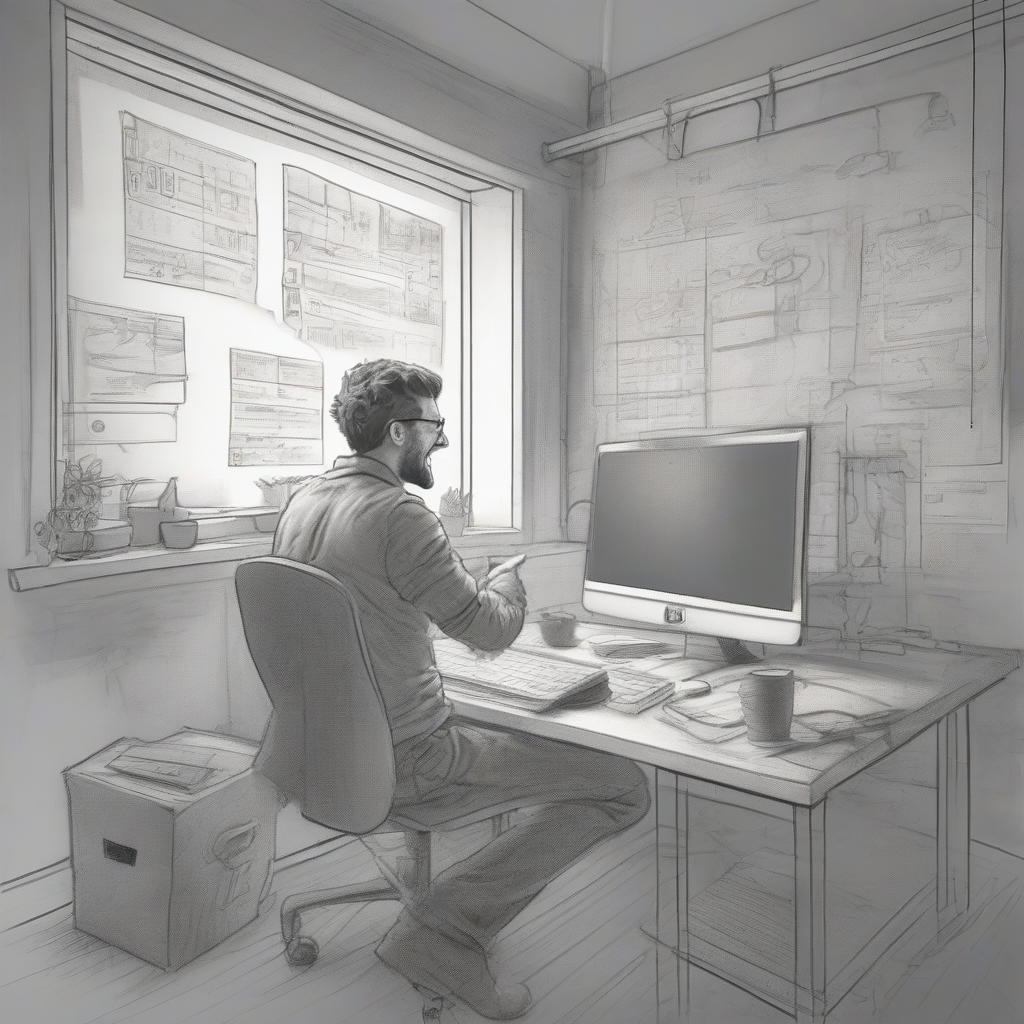

In [6]:
model = "@cf/stabilityai/stable-diffusion-xl-base-1.0"

response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    json={"prompt": "A pencil drawing of an excited developer using an API"}
)

display(Image(response.content))

## Translations

In [7]:
model = "@cf/meta/m2m100-1.2b"

response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    json={
        "text": "Artificial intelligence is pretty impressive these days. What do you think?",
        "source_lang": "english",
        "target_lang": "spanish"
    }
)

inference = response.json()
print(inference["result"]["translated_text"])

La inteligencia artificial es bastante impresionante en estos días. ¿Qué piensas?


## Text Classification

In [8]:
model = "@cf/huggingface/distilbert-sst-2-int8"

response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    json={"text": "This taco is delicious"}
)

inference = response.json()
inference["result"]

[{'label': 'NEGATIVE', 'score': 0.00012679687642958015},
 {'label': 'POSITIVE', 'score': 0.999873161315918}]

## Automatic Speech Recognition

In [9]:
model = "@cf/openai/whisper"

# TODO: Record me talking about speech to text
url = "https://raw.githubusercontent.com/craigsdennis/notebooks-cloudflare-workers-ai/main/assets/craig-rambling.mp3"
display(Audio(url))
audio = requests.get(url)

response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    data=audio.content
)

inference = response.json()
inference

{'result': {'text': "Hello there, I'm making a recording for a Jupiter notebook. That's a Python notebook, Jupiter, J-U-P-Y-T-E-R. Not to be confused with the planet. Anyways, let me hear you. I'm gonna talk a little bit. I'm gonna make a little bit of noise. Say some hard words. I'm gonna say Kubernetes. I'm not actually even talking about Kubernetes. I just want to see if they can do Kubernetes. Anyway, this is a test of transcription and let's see how we're dead!",
  'word_count': 86,
  'words': [{'word': 'Hello',
    'start': 0.30000001192092896,
    'end': 0.7599999904632568},
   {'word': 'there,', 'start': 0.7599999904632568, 'end': 1.2799999713897705},
   {'word': "I'm", 'start': 1.2799999713897705, 'end': 1.5},
   {'word': 'making', 'start': 1.5, 'end': 1.7000000476837158},
   {'word': 'a', 'start': 1.7000000476837158, 'end': 1.8600000143051147},
   {'word': 'recording',
    'start': 1.8600000143051147,
    'end': 2.2799999713897705},
   {'word': 'for', 'start': 2.2799999713897

## Image Classification

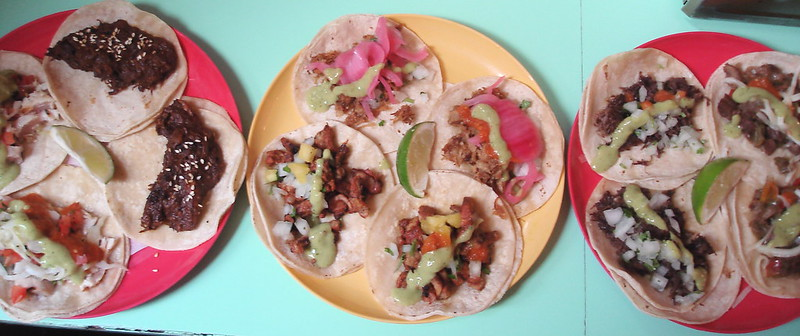

{'result': [{'label': 'POMEGRANATE', 'score': 0.5249796509742737},
  {'label': 'PIZZA', 'score': 0.133614644408226},
  {'label': 'PLATE', 'score': 0.0558786503970623},
  {'label': 'HOTDOG', 'score': 0.04129450023174286},
  {'label': 'CLOG', 'score': 0.037649840116500854}],
 'success': True,
 'errors': [],
 'messages': []}

In [10]:
model = "@cf/microsoft/resnet-50"

url = "https://raw.githubusercontent.com/craigsdennis/notebooks-cloudflare-workers-ai/main/assets/flickr-cc-tacos.jpg"
image_request = requests.get(url)

display(Image(image_request.content, format="jpg"))
response = requests.post(
    f"https://api.cloudflare.com/client/v4/accounts/{account_id}/ai/run/{model}",
    headers={"Authorization": f"Bearer {api_token}"},
    data=image_request.content
)

inference = response.json()
inference